In [133]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import scipy as sp
import seaborn
import pandas as pd
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [134]:
num_clusters = 15

In [135]:
train_data = fetch_20newsgroups(subset='train', 
                                random_state=42,
                                remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test',
                               random_state=42,
                               remove=('headers', 'footers', 'quotes'))

In [136]:
test_labels, train_labels = test_data.target, train_data.target

In [137]:
train_data.filenames

array(['C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\devmy\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U95')

In [138]:
# Make a dataframe object for training and testing data.  Labels correspond to the 20 different
# news groups
train = {'Labels': train_labels, 'Posts': train_data.data}
train_df = pd.DataFrame(data=train)
train_df

,Labels,Posts
0,7,I was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh..."
3,1,\nDo you have Weitek's address/phone number? ...
4,14,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...,...
11309,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,4,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,3,I just installed a DX2-66 CPU in a clone mothe...
11312,1,\nWouldn't this require a hyper-sphere. In 3-...


In [139]:
test = {'Labels': test_labels, 'Posts': test_data.data}
test_df = pd.DataFrame(data=test) 
test_df

,Labels,Posts
0,7,I am a little confused on all of the models of...
1,5,I'm not familiar at all with the format of the...
2,0,"\nIn a word, yes.\n"
3,17,\nThey were attacking the Iraqis to drive them...
4,19,\nI've just spent two solid months arguing tha...
...,...,...
7527,14,"\n Henry, if I read you correctly, you may b..."
7528,4,"about\nthem on\n\nActually, I thought Macs wer..."
7529,9,"I sent a version of this post out a while ago,..."
7530,6,I have this kit which includes the following :...


In [140]:
# Need to use stemming to count words that have similar meaning by comparing their stems
english_stemmer =nltk.stem.SnowballStemmer('english')

In [141]:
#Class to convert text to a bag-of-words vector of counts using sklearn CountVectorizer
# Note: tfidf stands for term frequency - inverse document frequency.  This is helpful for
# de-noising the data i.e. penalizing words that occur in many posts, while focusing more 
# on words that occur often in fewer posts.  
class StemmedTfidfVectorizer(TfidfVectorizer):
    '''This code comes from the Richert textbook code'''
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [142]:
vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', 
                                    decode_error='ignore')
vectorized_train = vectorizer.fit_transform(train_df['Posts'])

In [143]:
kmeans15 = KMeans(n_clusters=num_clusters,
                  n_init = 1,
                  verbose = 1,
                  random_state=3)

In [144]:
clustered = kmeans15.fit(vectorized_train)

Initialization complete
Iteration 0, inertia 20477.75931338571
Iteration 1, inertia 10643.052374117344
Iteration 2, inertia 10583.018201143217
Iteration 3, inertia 10563.784302690998
Iteration 4, inertia 10552.589457497266
Iteration 5, inertia 10538.014951677971
Iteration 6, inertia 10526.078125167496
Iteration 7, inertia 10521.672209544859
Iteration 8, inertia 10518.116322103486
Iteration 9, inertia 10515.583477168226
Iteration 10, inertia 10513.418915146087
Iteration 11, inertia 10511.902482805395
Iteration 12, inertia 10510.808005973637
Iteration 13, inertia 10510.153489000255
Iteration 14, inertia 10509.597629110549
Iteration 15, inertia 10509.0521937879
Iteration 16, inertia 10508.555686079591
Iteration 17, inertia 10508.213339225218
Iteration 18, inertia 10507.94780950643
Iteration 19, inertia 10507.72972572684
Iteration 20, inertia 10507.58569362849
Iteration 21, inertia 10507.464730777909
Iteration 22, inertia 10507.387046588758
Iteration 23, inertia 10507.316154432232
Iteratio

In [145]:
print(np.array(kmeans15.labels_))
kmeanslabels = kmeans15.labels_

[10  8  2 ... 14  5 14]


[Text(0.5, 1.0, 'Bar Chart for K=15 Clusters'), Text(0.5, 0, 'Cluster')]

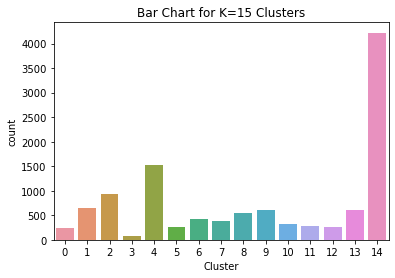

In [146]:
seaborn.countplot(x=kmeans15.labels_).set(title='Bar Chart for K=15 Clusters', xlabel='Cluster')

In [147]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, kmeans15.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, kmeans15.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, kmeans15.labels_))
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(train_labels, kmeans15.labels_))
print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(train_labels, kmeans15.labels_))
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(vectorized_train, train_labels, sample_size=1000)))


Homogeneity: 0.276
Completeness: 0.378
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.316
Silhouette Coefficient: -0.008


In [148]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

next_post = \
"""Looking for an Indian motorbike in mint condition.  I want it like new, with
big tires and a comfortable seat.  I am willing to pay thirty dollars for 
this ride.  Help me out?"""

last_post = \
"""Do atheists believe in God?"""

In [149]:
new_post_vector = vectorizer.transform([new_post])
new_post_label = kmeans15.predict(new_post_vector)[0]

In [150]:
similar_indices = (kmeans15.labels_ == new_post_label).nonzero()[0]

In [151]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i]))   

In [152]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 264
=== #1 ===
(0.9491516479437525, "Hi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n+-------------------------------------------------------------------+\n")

=== #2 ===
(1.1895589068880998, "I am having trouble with SCSI on a Mac IIfx. The machine is 3 years old\nand I have been us

In [153]:
next_post_vector = vectorizer.transform([next_post])
next_post_label = kmeans15.predict(next_post_vector)[0]

In [154]:
similar_indices = (kmeans15.labels_ == next_post_label).nonzero()[0]

In [155]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((next_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i])) 

In [156]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 4222
=== #1 ===
(0.9999999999999998, '')

=== #2 ===
(1.3661688970341082, "Sherri Nichols writes\n\nOr a young Don Bordello...\n\n\nThere's a strong possibility that the Bucs have absolutely no other catching  \nprospects in the minors at this point -- at least nobody ready for any serious  \nAAA/majors duty.  The main reason they might have stayed with Prince could be  \njust age, especially if Spanky was creeping toward his mid-30s or something.\n \nAll things considered, though, I'd be a lot more comfortable with Spanky behind  \nthe plate than Prince.  Isn't there decent backup backstop out there looking  \nfor work?\n\n")

=== #3 ===
(1.414213562373095, '\n\n\nAre we talking about an xterm which would accept the same escape sequences\nas that for VT340 (or colour decterm/dxterm)? I thought that was called\ncolxterm (and my testing of it shows some oddities that might be bugs or\nmight be my program going wrong).')
=== #4 ===
(1.4142135623730954, 'begin 644 outOfCont

In [157]:
last_post_vector = vectorizer.transform([last_post])
last_post_label = kmeans15.predict(last_post_vector)[0]

In [158]:
similar_indices = (kmeans15.labels_ == last_post_label).nonzero()[0]

In [159]:
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((last_post_vector - vectorized_train[i]).toarray())
    similar.append((dist, train_data.data[i])) 

In [160]:
similar = sorted(similar)
print("Count similar: %i" % len(similar))

show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

print("=== #4 ===")
print(similar[-1])

Count similar: 417
=== #1 ===
(0.8504556061851828, 'Archive-name: atheism/introduction\nAlt-atheism-archive-name: introduction\nLast-modified: 5 April 1993\nVersion: 1.2\n\n-----BEGIN PGP SIGNED MESSAGE-----\n\n                          An Introduction to Atheism\n                       by mathew <mathew@mantis.co.uk>\n\nThis article attempts to provide a general introduction to atheism.  Whilst I\nhave tried to be as neutral as possible regarding contentious issues, you\nshould always remember that this document represents only one viewpoint.  I\nwould encourage you to read widely and draw your own conclusions; some\nrelevant books are listed in a companion article.\n\nTo provide a sense of cohesion and progression, I have presented this article\nas an imaginary conversation between an atheist and a theist.  All the\nquestions asked by the imaginary theist are questions which have been cropped\nup repeatedly on alt.atheism since the newsgroup was created.  Some other\nfrequently asked

In [161]:
# Now, vectorize the testing data and make predictions using the model
vectorized_test = vectorizer.fit_transform(test_df['Posts'])

In [162]:
predictions = kmeans15.fit_predict(vectorized_test)

Initialization complete
Iteration 0, inertia 13666.481464216573
Iteration 1, inertia 7072.673662070938
Iteration 2, inertia 7024.73206471177
Iteration 3, inertia 7003.916099189339
Iteration 4, inertia 6996.0816702368
Iteration 5, inertia 6991.8680887584105
Iteration 6, inertia 6989.322624384354
Iteration 7, inertia 6986.917839090687
Iteration 8, inertia 6985.025587310571
Iteration 9, inertia 6983.467993939041
Iteration 10, inertia 6982.464221738696
Iteration 11, inertia 6981.51981981058
Iteration 12, inertia 6979.596825486872
Iteration 13, inertia 6977.740917668761
Iteration 14, inertia 6977.0016400858385
Iteration 15, inertia 6976.272645412529
Iteration 16, inertia 6975.585123794377
Iteration 17, inertia 6975.018960874264
Iteration 18, inertia 6974.58632591863
Iteration 19, inertia 6974.2405672203795
Iteration 20, inertia 6973.880466744877
Iteration 21, inertia 6973.49665861658
Iteration 22, inertia 6973.201876394065
Iteration 23, inertia 6972.7973448697285
Iteration 24, inertia 6972.

In [163]:
adjusted_rand_score(test_df['Labels'], predictions)

0.07802431017317989

In [164]:
# Now, do a KMeans clustering with k=15 clusters, but normalizing the white space of the input data and smashing everything
# to lower case

In [165]:
def normalize_whitespace(txt):
    if '\n' in txt: txt = txt.replace('\n', ' ')
    if '\t' in txt: txt = txt.replace('\t', ' ')
    return txt

In [166]:
column = train_df['Posts'].values # returns an array of the posts in the train dataframe
new_column, new_post = [], '', 
for post in column: 
    new_post = normalize_whitespace(post)
    new_column.append(new_post.lower())
train_df['Normalized Posts'] = new_column

In [167]:
train_df

,Labels,Posts,Normalized Posts
0,7,I was wondering if anyone out there could enli...,i was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...,a fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh...","well folks, my mac plus finally gave up the gh..."
3,1,\nDo you have Weitek's address/phone number? ...,do you have weitek's address/phone number? i...
4,14,"From article <C5owCB.n3p@world.std.com>, by to...","from article <c5owcb.n3p@world.std.com>, by to..."
...,...,...,...
11309,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn> from: nyeda@cnsvax.uwec.edu (david nye) dn...
11310,4,"I have a (very old) Mac 512k and a Mac Plus, b...","i have a (very old) mac 512k and a mac plus, b..."
11311,3,I just installed a DX2-66 CPU in a clone mothe...,i just installed a dx2-66 cpu in a clone mothe...
11312,1,\nWouldn't this require a hyper-sphere. In 3-...,wouldn't this require a hyper-sphere. in 3-s...


In [168]:
column = test_df['Posts'].values # returns an array of the posts in the train dataframe
new_column, new_post = [], '', 
for post in column: 
    new_post = normalize_whitespace(post)
    new_column.append(new_post.lower())
test_df['Normalized Posts'] = new_column

In [169]:
test_df

,Labels,Posts,Normalized Posts
0,7,I am a little confused on all of the models of...,i am a little confused on all of the models of...
1,5,I'm not familiar at all with the format of the...,i'm not familiar at all with the format of the...
2,0,"\nIn a word, yes.\n","in a word, yes."
3,17,\nThey were attacking the Iraqis to drive them...,they were attacking the iraqis to drive them ...
4,19,\nI've just spent two solid months arguing tha...,i've just spent two solid months arguing that...
...,...,...,...
7527,14,"\n Henry, if I read you correctly, you may b...","henry, if i read you correctly, you may be..."
7528,4,"about\nthem on\n\nActually, I thought Macs wer...","about them on actually, i thought macs were s..."
7529,9,"I sent a version of this post out a while ago,...","i sent a version of this post out a while ago,..."
7530,6,I have this kit which includes the following :...,i have this kit which includes the following :...


In [170]:
norm_vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                         stop_words='english', 
                                         decode_error='ignore')
norm_vectorized_train = vectorizer.fit_transform(train_df['Normalized Posts'])
num_samples, num_features = norm_vectorized_train.shape
print(f"#samples: {num_samples} and #features: {num_features}.")

#samples: 11314 and #features: 7824.


In [171]:
norm_kmeans15 = KMeans(n_clusters=15,
                       n_init = 1,
                       verbose = 1,
                       random_state=3)
norm_clustered = norm_kmeans15.fit(norm_vectorized_train)

Initialization complete
Iteration 0, inertia 20477.75931338571
Iteration 1, inertia 10643.052374117344
Iteration 2, inertia 10583.018201143217
Iteration 3, inertia 10563.784302690998
Iteration 4, inertia 10552.589457497266
Iteration 5, inertia 10538.014951677971
Iteration 6, inertia 10526.078125167496
Iteration 7, inertia 10521.672209544859
Iteration 8, inertia 10518.116322103486
Iteration 9, inertia 10515.583477168226
Iteration 10, inertia 10513.418915146087
Iteration 11, inertia 10511.902482805395
Iteration 12, inertia 10510.808005973637
Iteration 13, inertia 10510.153489000255
Iteration 14, inertia 10509.597629110549
Iteration 15, inertia 10509.0521937879
Iteration 16, inertia 10508.555686079591
Iteration 17, inertia 10508.213339225218
Iteration 18, inertia 10507.94780950643
Iteration 19, inertia 10507.72972572684
Iteration 20, inertia 10507.58569362849
Iteration 21, inertia 10507.464730777909
Iteration 22, inertia 10507.387046588758
Iteration 23, inertia 10507.316154432232
Iteratio

In [172]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, norm_kmeans15.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, norm_kmeans15.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, norm_kmeans15.labels_))
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(train_labels, norm_kmeans15.labels_))
print("Adjusted Mutual Information: %0.3f" %
      metrics.adjusted_mutual_info_score(train_labels, norm_kmeans15.labels_))
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(norm_vectorized_train, train_labels, sample_size=1000)))

Homogeneity: 0.276
Completeness: 0.378
V-measure: 0.319
Adjusted Rand Index: 0.073
Adjusted Mutual Information: 0.316
Silhouette Coefficient: -0.013


In [173]:
# Now, vectorize the testing data and make predictions using the model
norm_vectorized_test = vectorizer.fit_transform(test_df['Normalized Posts'])

In [174]:
norm_predictions = norm_kmeans15.fit_predict(norm_vectorized_test)

Initialization complete
Iteration 0, inertia 13666.481464216573
Iteration 1, inertia 7072.673662070938
Iteration 2, inertia 7024.73206471177
Iteration 3, inertia 7003.916099189339
Iteration 4, inertia 6996.0816702368
Iteration 5, inertia 6991.8680887584105
Iteration 6, inertia 6989.322624384354
Iteration 7, inertia 6986.917839090687
Iteration 8, inertia 6985.025587310571
Iteration 9, inertia 6983.467993939041
Iteration 10, inertia 6982.464221738696
Iteration 11, inertia 6981.51981981058
Iteration 12, inertia 6979.596825486872
Iteration 13, inertia 6977.740917668761
Iteration 14, inertia 6977.0016400858385
Iteration 15, inertia 6976.272645412529
Iteration 16, inertia 6975.585123794377
Iteration 17, inertia 6975.018960874264
Iteration 18, inertia 6974.58632591863
Iteration 19, inertia 6974.2405672203795
Iteration 20, inertia 6973.880466744877
Iteration 21, inertia 6973.49665861658
Iteration 22, inertia 6973.201876394065
Iteration 23, inertia 6972.7973448697285
Iteration 24, inertia 6972.

In [175]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(test_labels, predictions))
print("Completeness: %0.3f" % metrics.completeness_score(test_labels, predictions))

Homogeneity: 0.263
Completeness: 0.363


[Text(0.5, 1.0, 'Bar Chart for Cluster Elements'), Text(0.5, 0, 'Cluster')]

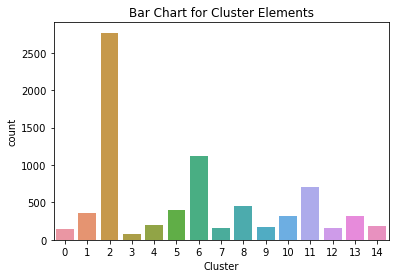

In [176]:
seaborn.countplot(x=norm_predictions).set(title='Bar Chart for Cluster Elements', xlabel='Cluster')